In [1]:
import torch
import sys
import os 
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image


In [2]:
IMG_DIR = os.path.join(os.getcwd(), 'CelebAzip\img_align_celeba\img_align_celeba')
BOUNDING_BOX_FILE = os.path.join(os.getcwd(), 'CelebAzip\list_bbox_celeba.csv')
ATTRIBUTES_FILE = os.path.join(os.getcwd(), 'CelebAzip\list_attr_celeba.csv')
PARTITION_FILE = os.path.join(os.getcwd(), 'CelebAzip\list_eval_partition.csv')


In [3]:
OUTPUT_DIR = os.path.join(os.getcwd(), 'CelebAzip\processed')
os.makedirs(OUTPUT_DIR, exist_ok=True)


In [4]:
bounding_box_df= pd.read_csv(BOUNDING_BOX_FILE)
bounding_box_df

,image_id,x_1,y_1,width,height
0,000001.jpg,95,71,226,313
1,000002.jpg,72,94,221,306
2,000003.jpg,216,59,91,126
3,000004.jpg,622,257,564,781
4,000005.jpg,236,109,120,166
...,...,...,...,...,...
202594,202595.jpg,1381,91,221,306
202595,202596.jpg,137,129,114,158
202596,202597.jpg,53,76,91,126
202597,202598.jpg,195,28,91,126


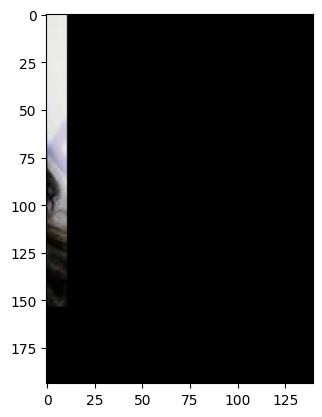

In [7]:
def get_bounded_image(image_name):
    IMAGE_PATH  = os.path.join(IMG_DIR, image_name) 
    image =Image.open(IMAGE_PATH)
    BOUNDING_BOX_PATH = bounding_box_df[bounding_box_df["image_id"]== image_name].values[0][1:]
    x_1, y_1, width, height = BOUNDING_BOX_PATH
    x_2 = x_1 + width 
    y_2 = y_1 + height
    image = image.crop((x_1, y_1, x_2, y_2)).convert('RGB')
    return image

    

plt.imshow(get_bounded_image('000058.jpg'))


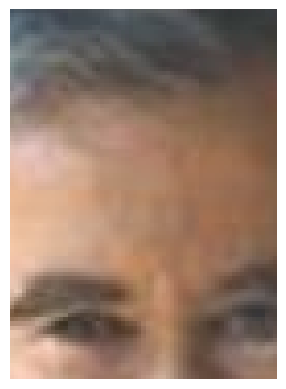

In [12]:

def get_bounded_image(image_name):
    # Define the image path
    image_path = os.path.join(IMG_DIR, image_name)
    
    # Load the image
    image = Image.open(image_path)
    
    # Get the bounding box for the image
    bounding_box = bounding_box_df[bounding_box_df["image_id"] == image_name]
    
    # Ensure bounding box exists
    if bounding_box.empty:
        raise ValueError(f"No bounding box found for image {image_name}")
    
    # Extract bounding box coordinates and convert to integers
    x_1, y_1, width, height = map(int, bounding_box.values[0][1:])
    x_2 = x_1 + width
    y_2 = y_1 + height
    
    # Crop the image using the bounding box and convert to RGB
    image = image.crop((x_1, y_1, x_2, y_2)).convert('RGB')
    
    return image

# Example usage
image_name = '000313.jpg'
plt.imshow(get_bounded_image(image_name))
plt.axis('off')  # Hide the axes for better visualization
plt.show()

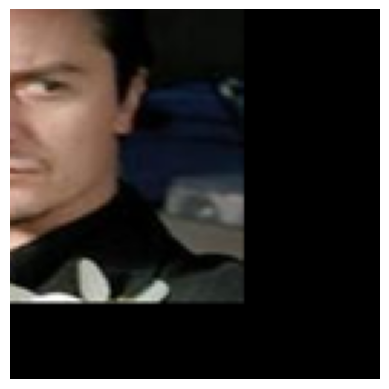

In [17]:

def get_bounded_image(image_name, target_size=(128, 128)):
    # Define the image path
    image_path = os.path.join(IMG_DIR, image_name)
    
    # Load the image
    image = Image.open(image_path)
    
    # Get the bounding box for the image
    bounding_box = bounding_box_df[bounding_box_df["image_id"] == image_name]
    
    # Ensure bounding box exists
    if bounding_box.empty:
        raise ValueError(f"No bounding box found for image {image_name}")
    
    # Extract bounding box coordinates and convert to integers
    x_1, y_1, width, height = map(int, bounding_box.values[0][1:])
    x_2 = x_1 + width
    y_2 = y_1 + height
    
    # Crop the image using the bounding box
    cropped_image = image.crop((x_1, y_1, x_2, y_2)).convert('RGB')
    
    # Resize the image to the target size
    resized_image = cropped_image.resize(target_size)
    
    return resized_image

# Example usage
image_name = '000123.jpg'
plt.imshow(get_bounded_image(image_name, target_size=(128, 128)))
plt.axis('off')  # Hide the axes for better visualization
plt.show()